In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('global_warming.csv')
df

,tweet,existence
0,Global warming report urges governments to act...,1
1,Fighting poverty and global warming in Africa ...,1
2,Carbon offsets: How a Vatican forest failed to...,1
3,Carbon offsets: How a Vatican forest failed to...,1
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,1
...,...,...
4220,It's 83�_� and climbing in NYC. August weather...,1
4221,"@bloodless_coup ""The phrase 'global warming' s...",1
4222,Global warming you tube parody you will enjoy ...,0
4223,One-Eyed Golfer: Don't dare tell me about glob...,0


In [24]:
df.shape

(4225, 2)

In [25]:
df.columns

Index(['tweet', 'existence'], dtype='object')

In [6]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Cleaning the reviews
corpus = []
for i in range(0,4225):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['tweet'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [27]:
#Before Preprocessing
df[0:10]

,tweet,existence
0,Global warming report urges governments to act...,1
1,Fighting poverty and global warming in Africa ...,1
2,Carbon offsets: How a Vatican forest failed to...,1
3,Carbon offsets: How a Vatican forest failed to...,1
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,1
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,1
6,Global warming evidence all around us|A messag...,1
7,Migratory Birds' New Climate Change Strategy: ...,1
8,Southern Africa: Competing for Limpopo Water: ...,1
9,"Global warming to impact wheat, rice productio...",1


In [28]:
#After Preprocessing
corpus[0:10]

['global warm report urg govern act brussel belgium ap world face increas hunger link',
 'fight poverti global warm africa link',
 'carbon offset vatican forest fail reduc global warm link',
 'carbon offset vatican forest fail reduc global warm link',
 'uruguay tool need vulner climat chang link',
 'rt sejorg rt jaymiheimbuch ocean salti show global warm intensifi water cycl link',
 'global warm evid around us messag global warm denier doubter look around link',
 'migratori bird new climat chang strategi stay home link',
 'southern africa compet limpopo water climat chang bring higher temperatur south link',
 'global warm impact wheat rice product india ludhiana apr scarciti water seriou link']

In [37]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

In [38]:
X.shape

(4225, 4500)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [40]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [42]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 81.3%
Precision score is: 0.9
Recall score is: 0.84


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[169,  60],
       [ 98, 518]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

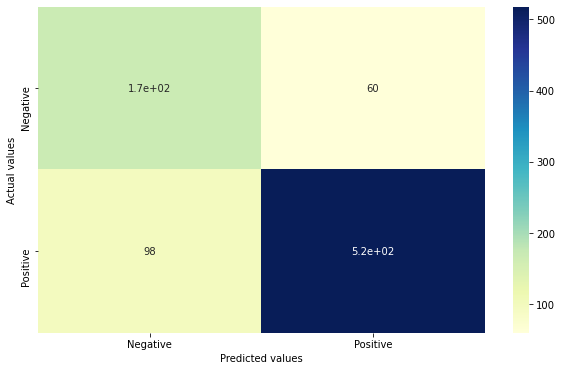

In [63]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [46]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 81.78%
Accuracy score for alpha=0.2 is: 80.59%
Accuracy score for alpha=0.3 is: 80.36%
Accuracy score for alpha=0.4 is: 80.12%
Accuracy score for alpha=0.5 is: 80.0%
Accuracy score for alpha=0.6 is: 80.24%
Accuracy score for alpha=0.7 is: 80.36%
Accuracy score for alpha=0.8 is: 80.36%
Accuracy score for alpha=0.9 is: 81.07%
Accuracy score for alpha=1.0 is: 81.3%
--------------------------------------------
The best accuracy is 81.78% with alpha value as 0.1


In [47]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [48]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [61]:
# Predicting values
sample_review = 'global warming is occuring'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
